In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2

In [2]:
ds = tfds.load('mnist', split='train', shuffle_files=True)


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
assert isinstance(ds, tf.data.Dataset)

In [40]:
images = []
labels = []
for i in ds:
    images.append((i['image'].numpy()).reshape((28,28)))
    labels.append(i['label'].numpy())

In [6]:
import numpy as np

In [38]:
labels.shape

(60000,)

In [42]:
images = np.array(images)
labels = np.array(labels)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.3, shuffle=True)

In [44]:
x_train.shape

(42000, 28, 28)

In [45]:
x_test.shape

(18000, 28, 28)

In [48]:
import keras
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from keras.models import Sequential

In [52]:
model = Sequential([
    Conv2D(16,(5,5),activation = 'relu', input_shape=(28,28,1)),
    MaxPool2D(2,2),
    Conv2D(32,(5,5), activation='relu'),
    MaxPool2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [53]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 13s 4ms/step - loss: 0.3533 - accuracy: 0.9332
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0815 - accuracy: 0.9750
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0625 - accuracy: 0.9810
Epoch 4/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0538 - accuracy: 0.9835
Epoch 5/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0469 - accuracy: 0.9860
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0438 - accuracy: 0.9870
Epoch 7/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0411 - accuracy: 0.9888
Epoch 8/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0359 - accuracy: 0.9890
Epoch 9/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0365 - accuracy: 0.9897
Epoch 10/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.03

the accuracy of the model is 99 percent and the loss is 3.5 percent

In [55]:
model.evaluate(x_test,y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.0788 - accuracy: 0.9831


[0.07880398631095886, 0.9831110835075378]

the accuracy of the test is 98 percent, and the loss is 7.9 percent

1/1 [==============================] - 0s 20ms/step


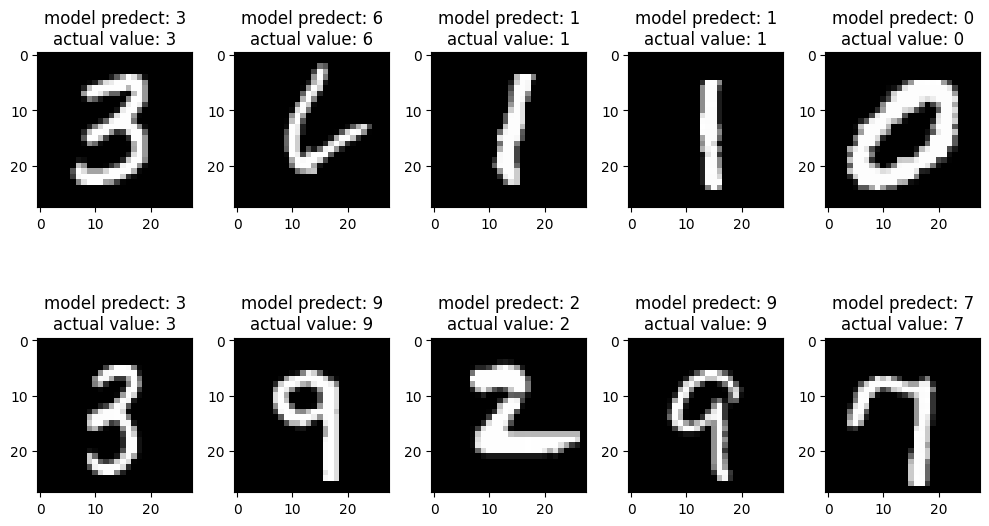

In [74]:
import matplotlib.pyplot as plt

# Create a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(10, 6))

# Customize the appearance of each subplot
s=0
for i in range(2):
    for j in range(5):
        axs[i, j].imshow(x_test[s],cmap='gray')
        axs[i, j].set_title(f"model predect: {np.argmax(model.predict(np.expand_dims(x_test[s],0)))}\nactual value: {y_test[s]}")
        s+=2

# Adjust layout and spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


In [56]:
model.save("mnist.h5")